# <center>TTK4255 - Assignment 1 by Dinosshan Thiagarajah </center>

## Exercise 1
### a)

$$
\begin{equation}
u = c_y+f_y\frac{Y}{Z} \\
Z = \frac{(u-c_y)}{Yf_y} = \frac{(130-240)}{-0.5\cdot1100} = 5
\end{equation}
$$



### b)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load file 
box = np.loadtxt('box.txt')

In [13]:
# Extract X, Y, Z coordinates of box in camera coordinates
X = box[:,0]
Y = box[:,1]
Z = box[:,2]

In [14]:
# Translate box 6 m in front of projection point
box_height = 2
box_distance = 5
Z_translated = box[:,2]+box_distance+box_height/2

In [15]:
# Calculate pixel coordinates
def camera_projection_3D_2_2D(X, Y, Z, c_x, c_y, f_x, f_y):
    u = c_x+f_x*np.divide(X,Z)
    v = c_y+f_y*np.divide(Y,Z)
    return u, v

c_x,c_y = 320,240
f_x,f_y = 1000,1100
u,v = camera_projection_3D_2_2D(X,Y,Z_translated,c_x,c_y,f_x,f_y)    

(480, 0)

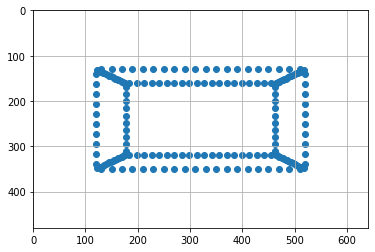

In [16]:
# Plot box
plt.scatter(u,v)
plt.grid(True)
plt.xlim(0,640)
plt.ylim(480,0) 

### c)
$$
T_o^{\text{c}} = T_z(t_z)R_x(\theta)R_y(\theta)
$$

In [17]:
# Define homogeneous transformation matrices
def T_z(t_z):
    return np.array([ \
    [1, 0,  0,  0], \
    [0, 1,  0,  0], \
    [0, 0,  1,  t_z], \
    [0, 0,  0,  1]])

def T_y(t_y):
    return np.array([ \
    [1, 0,  0,  0], \
    [0, 1,  0,  t_y], \
    [0, 0,  1,  0], \
    [0, 0,  0,  1]])

def T_x(t_x):
    return np.array([ \
    [1, 0,  0,  t_x], \
    [0, 1,  0,  0], \
    [0, 0,  1,  0], \
    [0, 0,  0,  1]])        

def R_x(theta):
    return np.array([ \
    [1, 0,              0,               0], \
    [0, np.cos(theta),  -np.sin(theta),  0], \
    [0, np.sin(theta),   np.cos(theta),  0], \
    [0, 0,               0,              1]])     

def R_y(theta):
    return np.array([ \
    [np.cos(theta), 0,  np.sin(theta),  0], \
    [0,             1,  0,              0], \
    [-np.sin(theta),0,  np.cos(theta),  0], \
    [0,             0,  0,              1]])

def R_z(theta):
    return np.array([ \
    [np.cos(theta), -np.sin(theta), 0,  0], \
    [np.sin(theta), np.cos(theta),  0,  0], \
    [0,             0,              1,  0], \
    [0,             0,              0,  1]])
    
# Helper function
def deg2rad(theta):
    return np.pi*theta/180 

### d)

In [18]:
# Plot coordinate frame
def plot_coordinate_frame(T,cx_dist,cy_dist,cx,cy,fx,fy,scale=1):
    V = T.dot(np.array([ \
    [scale,0,0,0], \
    [0,scale,0,0], \
    [0,0,scale,0], \
    [1,1,1,1]]))
 
    u,v = camera_projection_3D_2_2D(V[0],V[1],V[2],cx,cy,fx,fy)

    plt.arrow(u[3],v[3],u[0]-u[3],v[0]-v[3],color='r',width=5)
    plt.arrow(u[3],v[3],u[1]-u[3],v[1]-v[3],color='g',width=5)
    plt.arrow(u[3],v[3],u[2]-u[3],v[2]-v[3],color='b',width=5)    

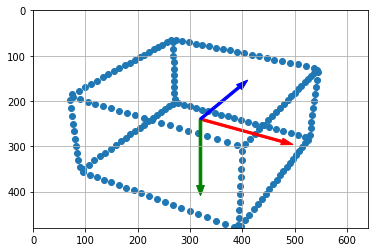

In [19]:
# Rotate and translate box and plot
off_dist = box_distance+box_height/2

T_o = T_z(off_dist).dot(R_x(deg2rad(30))).dot(R_y(deg2rad(30)))
box_rot = T_o.dot(box.transpose())

X = box_rot[0]
Y = box_rot[1]
Z = box_rot[2]
u,v = camera_projection_3D_2_2D(X,Y,Z,c_x,c_y,f_x,f_y)

# Plot box
plt.scatter(u,v)
plt.grid(True)
plt.xlim(0,640)
plt.ylim(480,0)
plot_coordinate_frame(T_o,0,0,c_x,c_y,f_x,f_y,1)

## Exercise 2
### a)

In [20]:
# Define platform coordinates
pf_dist = 0.1145  # [m]
pf_coord = np.array([ \
[0, pf_dist,    pf_dist,    0       ], \
[0, 0,          pf_dist,    pf_dist ], \
[0, 0,          0,          0       ], \
[1, 1,          1,          1       ]])

### b)

In [21]:
fx = 1075.47
fy = 1077.22
cx = 621.01
cy = 362.80
# Load image
img = plt.imread('quanser.jpg')

In [22]:
# Load platform to camera tranformation matrix
T_p2c = np.loadtxt('heli_pose.txt')
T_p2c

array([[ 0.894372 , -0.447712 ,  0.0127064, -0.25861  ],
       [-0.0929288, -0.213413 , -0.972924 ,  0.116584 ],
       [ 0.438049 ,  0.868713 , -0.232355 ,  0.791487 ],
       [ 0.       ,  0.       ,  0.       ,  1.       ]])

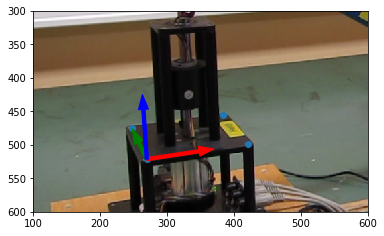

In [23]:
# Calculate platform coordinates
pf_coord_px = T_p2c.dot(pf_coord)
X = pf_coord_px[0]
Y = pf_coord_px[1]
Z = pf_coord_px[2]
u,v = camera_projection_3D_2_2D(X,Y,Z,cx,cy,fx,fy)

# Plot platform coordinates + frame
plt.scatter(u,v)
plt.imshow(img)
plt.xlim(100,600)
plt.ylim(600,300)
plot_coordinate_frame(T_p2c,pf_dist/2,pf_dist/2,cx,cy,fx,fy,scale=pf_dist*0.5)

### c) &rarr; e)

In [24]:
# Tranformation matrices of quanser helicopter

# T: base to platform
def T_b2p(psi):
    return T_y(pf_dist/2).dot(T_x(pf_dist/2)).dot(R_z(psi))

# T: hinch to base
base2hinch_dist = 0.325  # [m]
def T_h2b(theta):
    return T_z(base2hinch_dist).dot(R_y(theta))  

# T: arm to hinch
hitch2arm_dist = 0.0552  # [m]
def T_a2h():
    return T_z(-hitch2arm_dist)

# T: rotors to arm
arm2rot_dist1 = 0.653  # [m]
arm2rot_dist2 = 0.0312  # [m]
def T_r2a(phi):
    return R_x(phi).dot(T_z(-arm2rot_dist2).dot(T_x(arm2rot_dist1)))

### f)

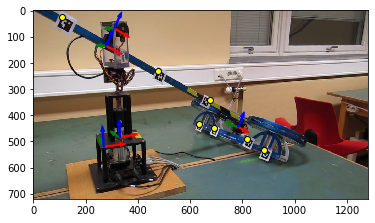

In [25]:
psi = deg2rad(11.77)
theta = deg2rad(28.87)
phi = deg2rad(-0.5)

############################
## Plot coordinate frames ##
############################
# Platform to camera
plot_coordinate_frame(T_p2c,pf_dist/2,pf_dist/2,cx,cy,fx,fy,scale=0.4*pf_dist)
# Base to camera
T_b2c = T_p2c.dot(T_b2p(psi))
plot_coordinate_frame(T_b2c,pf_dist/2,pf_dist/2,cx,cy,fx,fy,scale=0.35*pf_dist)
# Hinch to camera
T_h2c = T_b2c.dot(T_h2b(theta))
plot_coordinate_frame(T_h2c,pf_dist/2,pf_dist/2,cx,cy,fx,fy,scale=0.3*pf_dist)
# Arm to camera
T_a2c = T_h2c.dot(T_a2h())
plot_coordinate_frame(T_a2c,pf_dist/2,pf_dist/2,cx,cy,fx,fy,scale=0.3*pf_dist)
# Rotors to camera
T_r2c = T_a2c.dot(T_r2a(phi))
plot_coordinate_frame(T_r2c,pf_dist/2,pf_dist/2,cx,cy,fx,fy,scale=0.4*pf_dist)

##################
## Plot markers ##
################## 
# Load and plot fidual markers
fidual_markers = np.loadtxt('heli_points.txt')
fidual_markers.shape

# Arm frame markers
arm_frame_coord = T_a2c.dot(fidual_markers[0:3,:].transpose())
X = arm_frame_coord[0,:]
Y = arm_frame_coord[1,:]
Z = arm_frame_coord[2,:]
u,v = camera_projection_3D_2_2D(X,Y,Z,cx,cy,fx,fy)
plt.scatter(u,v,color='yellow',edgecolors='black')

# Rotors frame markers
arm_frame_coord = T_r2c.dot(fidual_markers[3:7,:].transpose())
X = arm_frame_coord[0,:]
Y = arm_frame_coord[1,:]
Z = arm_frame_coord[2,:]
u,v = camera_projection_3D_2_2D(X,Y,Z,cx,cy,fx,fy)
plt.scatter(u,v,color='yellow',edgecolors='black')

plt.imshow(img)